# COVID-19 Geographic Map
This tutorial will visualize COVID-19 data as a geographic map and will use a preprocessed dataset from [COVID-19 Time Series](tutorials/covid_19_timeseries.ipynb) and [COVID-19 Bar Chart Race](covid_19_bar_chart_race.ipynb) tutorials.

Click [here](covid_19_geographic_map.ipynb#final-animation) to see the full animation.

### load data

Here, we import ahlive and open the preprocessed dataset and further preprocess it.

For the sake of this tutorial, only a week in January 2021 will be shown.

In [1]:
import ahlive as ah
import pandas as pd
df = ah.tutorial.open_dataset('covid19_global_cases')

# convert cases to new cases per day
df_diff = df.pivot_table(
    'cases', columns='country_region', index='date'
).diff()
df_melt = df_diff.dropna().reset_index().melt(
    'date', value_name='new_cases'
).sort_values('date')

# start in March when testing became available
df_slice  = df_melt.loc[df_melt['date'] >= '2020-03-01']

# normalize by population
df_pop = ah.tutorial.open_dataset('covid19_population')[['combined_key', 'population']]
df_norm = df_slice .merge(df_pop, left_on='country_region', right_on='combined_key')
df_norm['new_cases'] = df_norm['new_cases'] / df_norm['population']
df_norm['new_cases'] *= 1e5

# join lats/lons
df_coords = df[['country_region', 'lat', 'long']].drop_duplicates(subset='country_region')
df_norm = df_norm.merge(df_coords, left_on='country_region', right_on='country_region')
df_norm = df_norm.loc[
    (df_norm['date'] >= '2021-01-01') &
    (df_norm['date'] < '2021-01-07')
]

display(df_norm)

COVID19 GLOBAL CASES | Source: JHU CSSE COVID-19 | https://github.com/CSSEGISandData/COVID-19
COVID19 POPULATION | Source: JHU CSSE COVID-19 | https://github.com/CSSEGISandData/COVID-19


date country_region  new_cases   combined_key  population  \
306   2021-01-01           Chad   0.170463           Chad  16425859.0   
307   2021-01-02           Chad   0.170463           Chad  16425859.0   
308   2021-01-03           Chad   0.267870           Chad  16425859.0   
309   2021-01-04           Chad   0.097407           Chad  16425859.0   
310   2021-01-05           Chad   0.365278           Chad  16425859.0   
...          ...            ...        ...            ...         ...   
65820 2021-01-02  Cote d'Ivoire   0.000000  Cote d'Ivoire  26378275.0   
65821 2021-01-03  Cote d'Ivoire   0.322235  Cote d'Ivoire  26378275.0   
65822 2021-01-04  Cote d'Ivoire   0.576232  Cote d'Ivoire  26378275.0   
65823 2021-01-05  Cote d'Ivoire   0.208505  Cote d'Ivoire  26378275.0   
65824 2021-01-06  Cote d'Ivoire   0.409428  Cote d'Ivoire  26378275.0   

           lat     long  
306    15.4542  18.7322  
307    15.4542  18.7322  
308    15.4542  18.7322  
309    15.4542  18.7322  
310    15.4542  18.7322  
...        ...      ...  
65820   7.5400  -5.5471  
65821   7.5400  -5.5471  
65822   7.5400  -5.5471  
65823   7.5400  -5.5471  
65824   7.5400  -5.5471  

[1152 rows x 7 columns]

We can now run a test!

[########################################] | 100% Completed | 11.3s



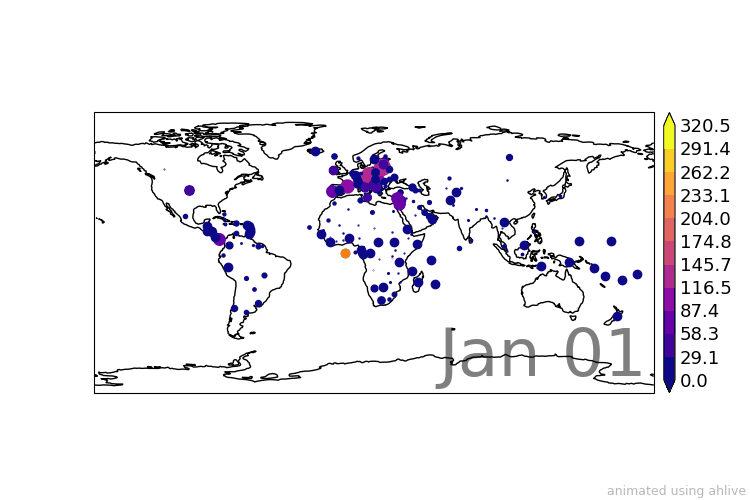

In [2]:
ah_df = ah.DataFrame(
    df_norm, 'long', 'lat', label='country_region',
    chart='scatter', cs='new_cases', s='new_cases',
    state_labels='date', crs='platecarree',
    worldwide=True, legend=False,
    scheduler='processes', workers=4,
    animate='test'
)
ah_df.render()

### tweak animation

Some things noticed:

1. The figure's aspect is not ideal.
2. The colorbar has awkward decimal values.
3. There are negative new cases.
4. Missing colorbar label.
5. There's negative cases.
6. To smooth, we can set `frames` and `interp`

[########################################] | 100% Completed | 10.4s



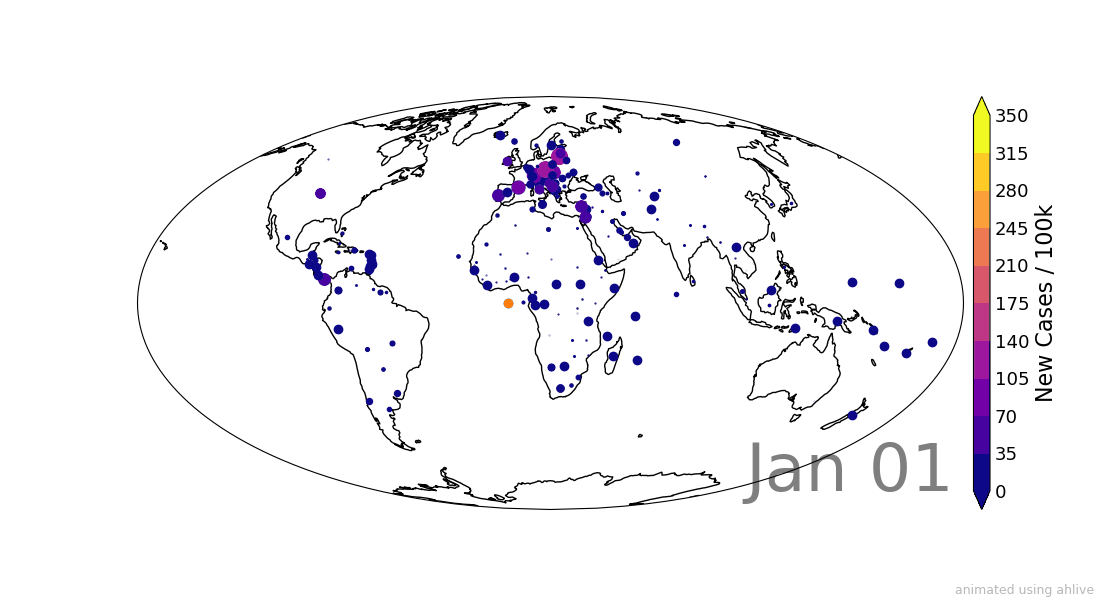

In [3]:
df_norm.loc[df_norm['new_cases'] < 0, 'new_cases'] = 0

ah_df = ah.DataFrame(
    df_norm, 'long', 'lat', label='country_region',
    chart='scatter', cs='new_cases', s='new_cases',
    state_labels='date', crs='platecarree',
    worldwide=True, legend=False,
    figsize=(11, 6), vmin=0, vmax=350,
    projection='mollweide', clabel='New Cases / 100k',
    frames=15, interp='cubic',
    scheduler='processes', workers=4,
    animate='test'
).config('cticks', format='.0f', num_colors=10)
ah_df.render()

### add annotations

Looks mostly good. We can add `title`, `subtitle`, `note`, `borders`, and `ocean`.

[########################################] | 100% Completed | 10.6s



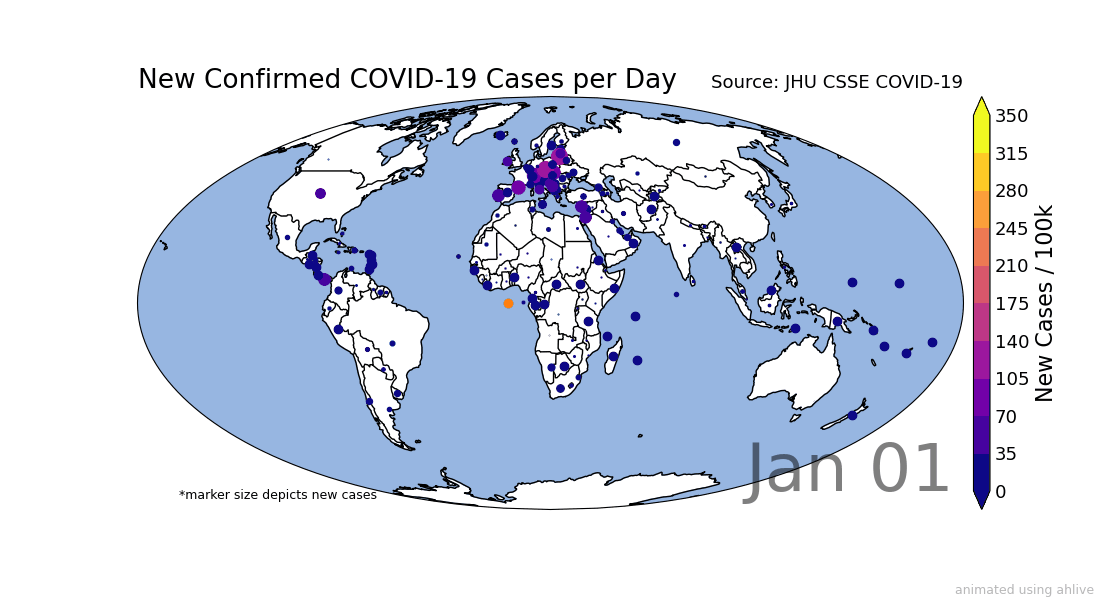

In [4]:
ah_df = ah.DataFrame(
    df_norm, 'long', 'lat', label='country_region',
    chart='scatter', cs='new_cases', s='new_cases',
    state_labels='date', crs='platecarree',
    worldwide=True, legend=False,
    figsize=(11, 6), vmin=0, vmax=350,
    projection='mollweide', clabel='New Cases / 100k',
    title='New Confirmed COVID-19 Cases per Day',
    subtitle='Source: JHU CSSE COVID-19', 
    note='*marker size depicts new cases',
    borders=True, ocean=True,
    frames=15, interp='cubic',
    scheduler='processes', workers=4,
    animate='test'
).config('cticks', format='.0f', num_colors=10)
ah_df.render()

### set preset

Since Europe seems a bit crowded, we can use another way to display through `preset='rotate'` and `Orthographic` projection. Since the projections' aspect changes from wide to square, we can move the source from `subtitle` to `caption` and update the `figsize` for a less wide aspect.

[########################################] | 100% Completed | 11.4s



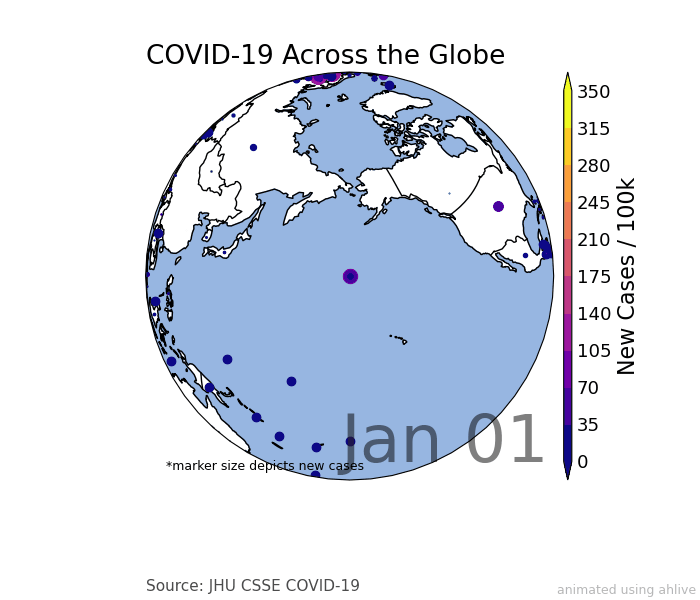

In [5]:
ah_df = ah.DataFrame(
    df_norm, 'long', 'lat', label='country_region',
    chart='scatter', cs='new_cases', s='new_cases',
    state_labels='date', crs='platecarree',
    worldwide=True, legend=False,
    figsize=(7, 6), vmin=0, vmax=350,
    clabel='New Cases / 100k',
    title='COVID-19 Across the Globe',
    caption='Source: JHU CSSE COVID-19', 
    note='*marker size depicts new cases',
    borders=True, ocean=True,
    frames=15, interp='cubic',
    projection='Orthographic',
    preset='rotate',
    scheduler='processes', workers=4,
    animate='test'
).config(
    'cticks', format='.0f', num_colors=10
).config(
    'projection', central_latitude=40
)
ah_df.render()

### final animation

We can also add a timeseries of the total confirmed cases across the globe.

[########################################] | 100% Completed |  1min  1.9s



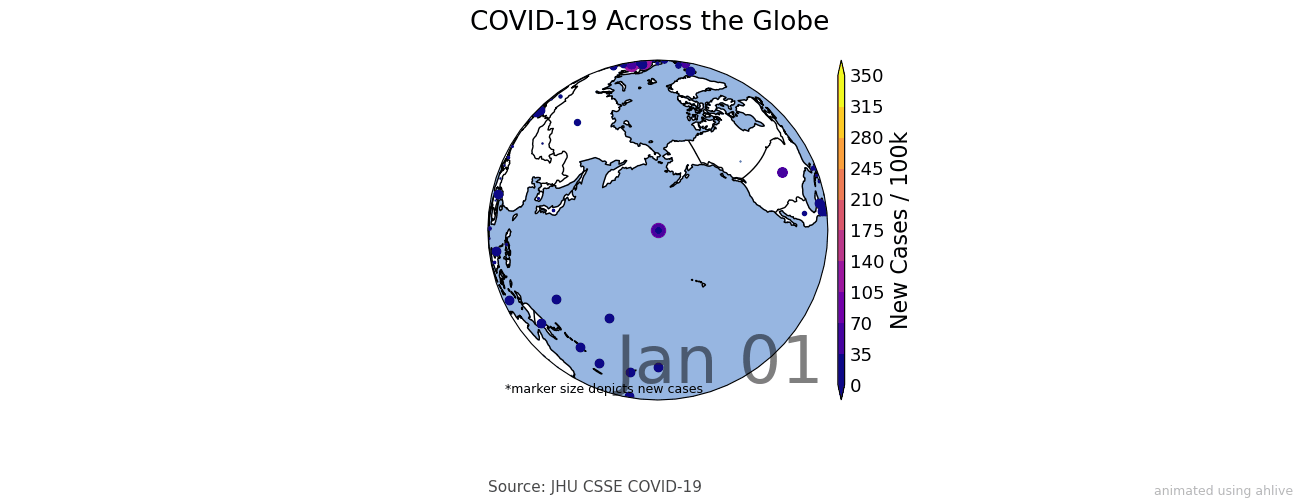

In [6]:
ah_df = ah.DataFrame(
    df_norm, 'long', 'lat', label='country_region',
    chart='scatter', cs='new_cases', s='new_cases',
    state_labels='date', crs='platecarree',
    worldwide=True, legend=False,
    figsize=(13, 5), vmin=0, vmax=350,
    clabel='New Cases / 100k',
    suptitle='COVID-19 Across the Globe',
    caption='Source: JHU CSSE COVID-19', 
    note='*marker size depicts new cases',
    borders=True, ocean=True,
    frames=15, interp='cubic',
    projection='Orthographic',
    preset='rotate',
    scheduler='processes', workers=4
).config(
    'cticks', format='.0f', num_colors=10
).config(
    'projection', central_latitude=40
)

ah_df.render()

### full code

```python
import ahlive as ah
import pandas as pd

# laod dataset
df = ah.tutorial.open_dataset('covid19_global_cases')

# convert cases to new cases per day
df_diff = df.pivot_table(
    'cases', columns='country_region', index='date'
).diff()
df_melt = df_diff.dropna().reset_index().melt(
    'date', value_name='new_cases'
).sort_values('date')

# start in March when testing became available
df_slice  = df_melt.loc[df_melt['date'] >= '2020-03-01']

# normalize by population
df_pop = ah.tutorial.open_dataset('covid19_population')[['combined_key', 'population']]
df_norm = df_slice .merge(df_pop, left_on='country_region', right_on='combined_key')
df_norm['new_cases'] = df_norm['new_cases'] / df_norm['population']
df_norm['new_cases'] *= 1e5

# join lats/lons
df_coords = df[['country_region', 'lat', 'long']].drop_duplicates(subset='country_region')
df_norm = df_norm.merge(df_coords, left_on='country_region', right_on='country_region')

# remove negative cases
df_norm.loc[df_norm['new_cases'] < 0, 'new_cases'] = 0

# render
ah_df = ah.DataFrame(
    df_norm, 'long', 'lat', label='country_region',
    chart='scatter', cs='new_cases', s='new_cases',
    state_labels='date', crs='platecarree',
    worldwide=True, legend=False,
    figsize=(13, 5), vmin=0, vmax=350,
    clabel='New Cases / 100k',
    suptitle='COVID-19 Across the Globe',
    caption='Source: JHU CSSE COVID-19', 
    note='*marker size depicts new cases',
    borders=True, ocean=True,
    frames=15, interp='cubic',
    projection='Orthographic',
    preset='rotate',
    scheduler='processes', workers=2
).config(
    'cticks', format='.0f', num_colors=10
).config(
    'projection', central_latitude=40
)

ah_df.render()
```